In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("train.csv")

## Основная информация о данных

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6702 non-null   int64  
 1   has_null                       6702 non-null   int64  
 2   wave                           6702 non-null   float64
 3   gender                         6702 non-null   object 
 4   age                            6626 non-null   float64
 5   age_o                          6620 non-null   float64
 6   race                           6651 non-null   object 
 7   race_o                         6645 non-null   object 
 8   samerace                       6702 non-null   int64  
 9   importance_same_race           6639 non-null   float64
 10  importance_same_religion       6639 non-null   float64
 11  field                          6651 non-null   object 
 12  pref_o_attractive              6631 non-null   f

## Статистическое описание данных

In [6]:
df.describe()

,id,has_null,wave,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
count,6702.000000,6702.000000,6702.000000,6626.000000,6620.000000,6702.000000,6639.000000,6639.000000,6631.000000,6631.000000,...,6639.000000,6639.000000,6577.000000,6623.000000,1458.000000,5743.000000,6514.000000,6452.000000,6399.000000,6702.000000
mean,3350.500000,0.874067,11.350045,26.345306,26.305438,0.398090,3.790029,3.639554,22.463742,17.410780,...,5.640006,4.344480,0.195326,5.535105,5.615912,3.227181,6.142109,5.218227,0.049383,0.163981
std,1934.845084,0.331798,6.028025,3.580997,3.528924,0.489541,2.852751,2.802596,12.522203,6.958779,...,2.595556,2.714417,0.303984,1.730201,4.795396,2.467702,1.839384,2.134206,0.274017,0.370286
min,0.000000,0.000000,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1675.250000,1.000000,7.000000,24.000000,24.000000,0.000000,1.000000,1.000000,15.000000,15.000000,...,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,3350.500000,1.000000,11.000000,26.000000,26.000000,0.000000,3.000000,3.000000,20.000000,18.180000,...,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000,0.000000
75%,5025.750000,1.000000,15.000000,28.000000,28.000000,1.000000,6.000000,6.000000,25.000000,20.000000,...,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000,0.000000
max,6701.000000,1.000000,21.000000,55.000000,55.000000,1.000000,10.000000,10.000000,100.000000,60.000000,...,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000,1.000000


## Распределение целевой переменной

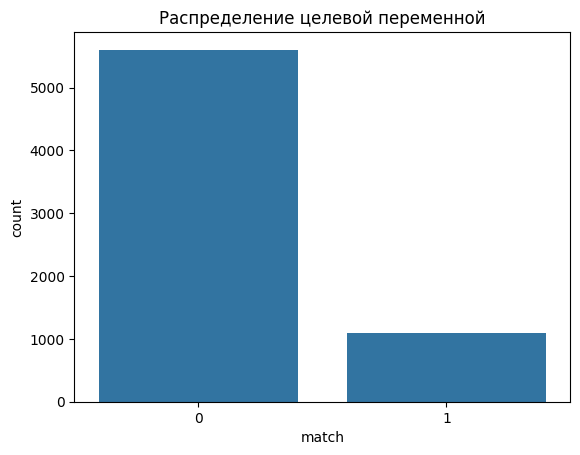

In [10]:
sns.countplot(x="match", data=df)
plt.title("Распределение целевой переменной")
plt.show()

## Предобработка данных
На этапе предобработки данных мы будем обрабатывать пропущенные значения, кодировать категориальные признаки и масштабировать числовые признаки. Этот шаг необходим для подготовки данных к обучению модели.

In [37]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

def preprocess_data(df):
    # Заполнение пропущенных значений
    imputer = SimpleImputer(strategy='mean')
    df_num = df.select_dtypes(include=['int64', 'float64'])
    df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
    
    # Заполнение пропущенных значений в категориальных столбцах модой
    df_cat = df.select_dtypes(include=['object']).fillna(df.mode().iloc[0])
    
    encoder = OrdinalEncoder()
    df_cat_encoded = pd.DataFrame(encoder.fit_transform(df_cat), columns=df_cat.columns)

    # Объединение числовых и категориальных данных
    df_processed = pd.concat([df_num_imputed, df_cat_encoded], axis=1)
    
    return df_processed

## Обучение моделей

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Подготовка данных
df = pd.read_csv("train.csv")
df = df.drop(['has_null'], axis=1)  # Удаление технических столбцов
df_processed = preprocess_data(df)

X = df_processed.drop("match", axis=1)
y = df_processed["match"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логистическая регрессия
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Логистическая регрессия - Accuracy:", accuracy_score(y_test, y_pred))
print("Логистическая регрессия - F1:", f1_score(y_test, y_pred))

# Дерево решений
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Дерево решений - Accuracy:", accuracy_score(y_test, y_pred))
print("Дерево решений - F1:", f1_score(y_test, y_pred))

# Случайный лес
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Случайный лес - Accuracy:", accuracy_score(y_test, y_pred))
print("Случайный лес - F1:", f1_score(y_test, y_pred))

# Градиентный бустинг
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Градиентный бустинг - Accuracy:", accuracy_score(y_test, y_pred))
print("Градиентный бустинг - F1:", f1_score(y_test, y_pred))


/home/hexzedels/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Логистическая регрессия - Accuracy: 0.8680089485458613
Логистическая регрессия - F1: 0.4553846153846154
Дерево решений - Accuracy: 0.7979120059656972
Дерево решений - F1: 0.3826879271070615
Случайный лес - Accuracy: 0.8583146905294556
Случайный лес - F1: 0.30656934306569344
Градиентный бустинг - Accuracy: 0.8672632363907532
Градиентный бустинг - F1: 0.44375


## Предсказание

In [51]:
df_test = pd.read_csv("test.csv")
df_test = df_test.drop(['has_null'], axis=1)

# Предобработка тестовых данных
df_test_processed = preprocess_data(df_test)

best_model = rf

# Предсказания
predictions = best_model.predict(df_test_processed)

submission = pd.DataFrame({"id": df_test_processed["id"], "target": predictions})
submission["id"] = submission["id"].astype(int)
submission["target"] = submission["target"].astype(int)
submission.to_csv("submission.csv", index=False)